In [4]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [16]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# Dividing data in dependent and independent features
X = dataset.iloc[: ,3:13] # All rows and 3 to 12th col
y = dataset.iloc[:,13] # 13th col

In [19]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [20]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [21]:
# Feature Engineering (One Hot Encoding and dropping first column)
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [22]:
# Dropping original columns
X = X.drop(['Geography', 'Gender'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [24]:
X = pd.concat([X, geography, gender], axis=1)

In [25]:
# Splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [29]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [35]:
# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [36]:
# Initilizing ANN
classifier = Sequential()

In [37]:
# Initilizing Input Layer
classifier.add(Dense(units=11, activation='relu')) # 11 inputs

In [38]:
# Intilizing Hidden Layer 1
classifier.add(Dense(units=7, activation='relu'))

In [39]:
# Initilizing Hidden Layer 2
classifier.add(Dense(units=6, activation='relu'))

In [40]:
# Initilizing Output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [41]:
classifier.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [47]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks= [early_stopping])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7897 - loss: 0.5424 - val_accuracy: 0.7955 - val_loss: 0.4620
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7871 - loss: 0.4600 - val_accuracy: 0.7970 - val_loss: 0.4363
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7995 - loss: 0.4327 - val_accuracy: 0.8236 - val_loss: 0.4121
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8392 - loss: 0.3980 - val_accuracy: 0.8379 - val_loss: 0.3906
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8478 - loss: 0.3774 - val_accuracy: 0.8410 - val_loss: 0.3800
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.3491 - val_accuracy: 0.8436 - val_loss: 0.3744
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8534 - loss: 0.3577 - val_accuracy: 0.8455 - val_loss: 0.3716
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8663 - loss: 0.3299 - val_accu

In [49]:
model_history.history.keys() # metrics  recorded during training

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

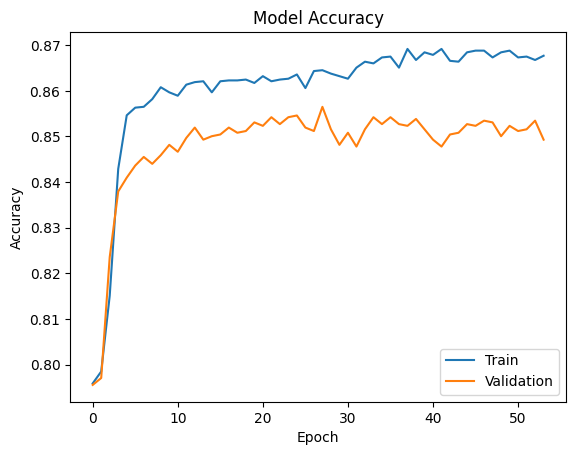

In [50]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


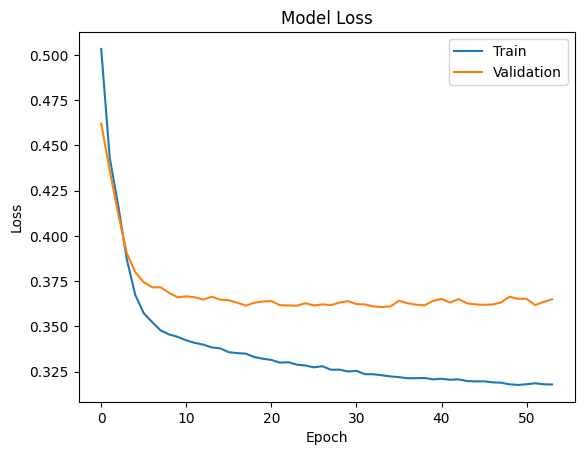

In [51]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [53]:
# Predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[1503,   92],
       [ 205,  200]])

In [56]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8515


In [60]:
w, b = classifier.layers[0].get_weights()
print("Weights:\n", w)
print("Biases:\n", b)


Weights:
 [[-0.4544082   0.02767279  0.12162946  0.68366325 -0.28151673  0.36447147
   0.02725203  0.00844625 -0.06931806  0.17338887  0.03793043]
 [ 0.65959835 -0.6760487  -0.5247135  -0.3314826  -0.55475545  0.35964003
  -0.11393978 -0.01465983 -0.67163956 -0.15467666  0.6276267 ]
 [-0.35117823  0.09164429 -0.05357024  0.27376643 -0.31660354  0.18484485
  -0.1997446  -0.10748142 -0.14185998 -0.02910555  0.11294646]
 [-0.39022496  0.2810672  -0.5169697  -0.48811468  0.00454203 -0.9177279
   0.24479154 -0.6556052  -0.33434224 -1.0259491  -0.146992  ]
 [-0.6043324  -0.2582284   0.24527876  0.2881118  -0.18488042 -0.6158887
   1.1673971   1.0453271   0.01408652 -0.14680125  0.181075  ]
 [-0.03437428 -0.10805518 -0.38815156  0.7239891   0.19505455  0.15270633
  -0.06268458  0.08064034  0.20544162 -0.5078592  -0.07378057]
 [-0.05085104 -0.4509318  -0.30526832 -0.10566644  0.19737369 -0.29915473
  -0.0702897  -0.15781868 -0.09076704  0.17175853  1.3014714 ]
 [-0.2970368  -0.364044    0.1003